<a href="https://colab.research.google.com/github/marsgitahi/British-Airways/blob/main/British_Airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Loading**

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import os


In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
# Create the data directory
os.makedirs("data", exist_ok=True)

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | On arriving at Mexico Airp...
1,✅ Trip Verified | I have flown British Airwa...
2,Not Verified | We bought tickets for a Geneva-...
3,✅ Trip Verified | Appalling service with fai...
4,✅ Trip Verified | British Airways charge you f...


In [ ]:
df.to_csv("data/BA_reviews.csv")

In [ ]:
# Data Types
df.dtypes

,0
reviews,object


#**DATA PREPROCESSING**

In [ ]:
# Libraries
import string
import re
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Removing the parts before | in the reviews column
df.reviews= df.reviews.str.split('|',expand=True)[0]
df

,reviews,Cleaned Reviews
0,On arriving at Mexico Airport we were told ...,On arriving at Mexico Airport we were told th...
1,I have flown British Airways for many years...,I have flown British Airways for many years a...
2,"We bought tickets for a Geneva-London flight,...",We bought tickets for a Geneva London flight ...
3,Appalling service with failing defective fl...,Appalling service with failing defective flee...
4,British Airways charge you for the pleasure o...,British Airways charge you for the pleasure o...
...,...,...
995,London Heathrow to Austin. 10 hour flight in...,London Heathrow to Austin hour flight in a Bo...
996,Mykonos to London flight delayed and waiting...,Mykonos to London flight delayed and waiting ...
997,Johannesburg to Cape Town return. This flight...,Johannesburg to Cape Town return This flight ...
998,Grenada to Gatwick. Having flown with BA on ...,Grenada to Gatwick Having flown with BA on th...


In [ ]:
# Removing punctuations

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,On arriving at Mexico Airport we were told ...,On arriving at Mexico Airport we were told th...
1,I have flown British Airways for many years...,I have flown British Airways for many years a...
2,"We bought tickets for a Geneva-London flight,...",We bought tickets for a Geneva London flight ...
3,Appalling service with failing defective fl...,Appalling service with failing defective flee...
4,British Airways charge you for the pleasure o...,British Airways charge you for the pleasure o...


In [ ]:
# Tagging
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,reviews,Cleaned Reviews,POS tagged
0,On arriving at Mexico Airport we were told ...,On arriving at Mexico Airport we were told th...,"[(arriving, v), (Mexico, n), (Airport, n), (to..."
1,I have flown British Airways for many years...,I have flown British Airways for many years a...,"[(flown, v), (British, a), (Airways, n), (many..."
2,"We bought tickets for a Geneva-London flight,...",We bought tickets for a Geneva London flight ...,"[(bought, v), (tickets, n), (Geneva, n), (Lond..."
3,Appalling service with failing defective fl...,Appalling service with failing defective flee...,"[(Appalling, n), (service, n), (failing, v), (..."
4,British Airways charge you for the pleasure o...,British Airways charge you for the pleasure o...,"[(British, a), (Airways, n), (charge, n), (ple..."


In [ ]:
# Lematizing

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,On arriving at Mexico Airport we were told ...,On arriving at Mexico Airport we were told th...,"[(arriving, v), (Mexico, n), (Airport, n), (to...",arrive Mexico Airport tell flight delay airc...
1,I have flown British Airways for many years...,I have flown British Airways for many years a...,"[(flown, v), (British, a), (Airways, n), (many...",fly British Airways many year still regularl...
2,"We bought tickets for a Geneva-London flight,...",We bought tickets for a Geneva London flight ...,"[(bought, v), (tickets, n), (Geneva, n), (Lond...",buy ticket Geneva London flight get airport ...
3,Appalling service with failing defective fl...,Appalling service with failing defective flee...,"[(Appalling, n), (service, n), (failing, v), (...",Appalling service fail defective fleet aircr...
4,British Airways charge you for the pleasure o...,British Airways charge you for the pleasure o...,"[(British, a), (Airways, n), (charge, n), (ple...",British Airways charge pleasure choose seat ...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,On arriving at Mexico Airport we were told ...,arrive Mexico Airport tell flight delay airc...
1,I have flown British Airways for many years...,fly British Airways many year still regularl...
2,"We bought tickets for a Geneva-London flight,...",buy ticket Geneva London flight get airport ...
3,Appalling service with failing defective fl...,Appalling service fail defective fleet aircr...
4,British Airways charge you for the pleasure o...,British Airways charge pleasure choose seat ...
...,...,...
995,London Heathrow to Austin. 10 hour flight in...,London Heathrow Austin hour flight Boeing No...
996,Mykonos to London flight delayed and waiting...,Mykonos London flight delayed wait depart ti...
997,Johannesburg to Cape Town return. This flight...,Johannesburg Cape Town return flight operate...
998,Grenada to Gatwick. Having flown with BA on ...,Grenada Gatwick fly BA aircraft type prior r...


#**Sentiment Analysis using VADER**

In [ ]:
# Libraries
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,On arriving at Mexico Airport we were told ...,On arriving at Mexico Airport we were told th...,"[(arriving, v), (Mexico, n), (Airport, n), (to...",arrive Mexico Airport tell flight delay airc...,0.2139,Neutral
1,I have flown British Airways for many years...,I have flown British Airways for many years a...,"[(flown, v), (British, a), (Airways, n), (many...",fly British Airways many year still regularl...,-0.7602,Negative
2,"We bought tickets for a Geneva-London flight,...",We bought tickets for a Geneva London flight ...,"[(bought, v), (tickets, n), (Geneva, n), (Lond...",buy ticket Geneva London flight get airport ...,-0.0258,Negative
3,Appalling service with failing defective fl...,Appalling service with failing defective flee...,"[(Appalling, n), (service, n), (failing, v), (...",Appalling service fail defective fleet aircr...,-0.8860,Negative
4,British Airways charge you for the pleasure o...,British Airways charge you for the pleasure o...,"[(British, a), (Airways, n), (charge, n), (ple...",British Airways charge pleasure choose seat ...,0.9730,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,463
Negative,427
Neutral,110


# **EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

In [ ]:
# Libraries
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

([<matplotlib.patches.Wedge at 0x7e0543deee30>,
 [Text(0.1275750809265686, 1.0925770447554624, 'Positive'),
  Text(-0.4901302603462026, -0.984770190396198, 'Negative'),
  Text(1.2701889961293427, -0.45729630887634853, 'Neutral')],
 [Text(0.06958640777812833, 0.5959511153211613, '46.3%'),
  Text(-0.2673437783706559, -0.5371473765797443, '42.7%'),
  Text(0.799748627192549, -0.287927305588812, '11.0%')])

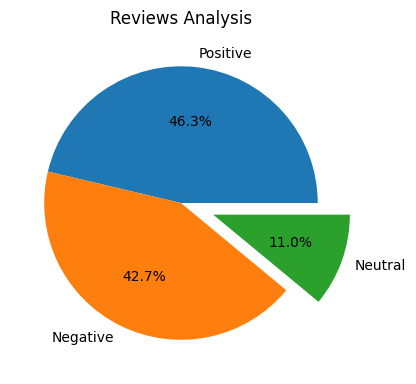

In [ ]:
# Pie Chart
plt.figure(figsize=(15,7))
plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

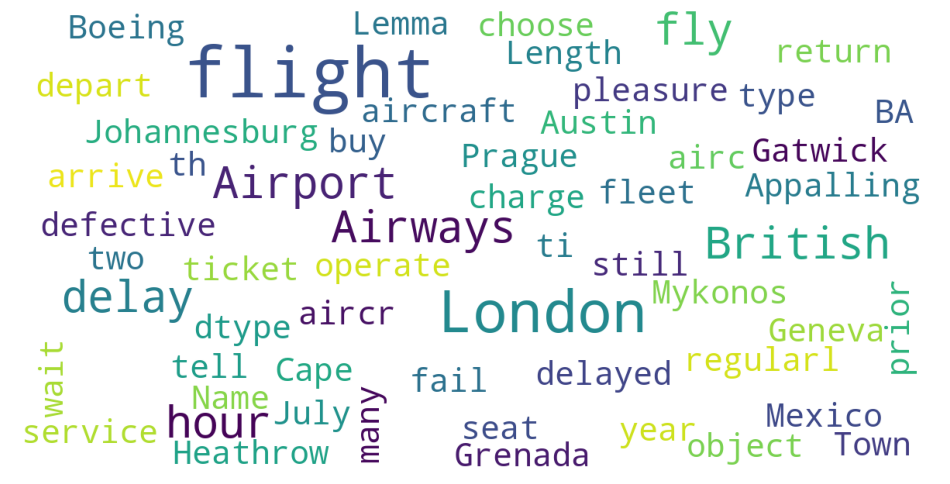

In [ ]:
# Word cloud
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)
